In [1]:
import warnings 
warnings.filterwarnings('ignore')

In [2]:
import matplotlib.pyplot as plt
import cv2
#technically not necessary in newes versions of jupyter
%matplotlib inline

In [3]:
cat4=cv2.imread("C:/Computer Vision/Cats and Dogs/PetImages/Cat/4.jpg")
cat4=cv2.cvtColor(cat4,cv2.COLOR_BGR2RGB)

In [4]:
cat4.shape

(375, 500, 3)

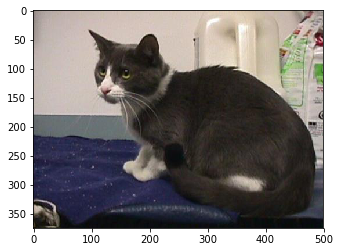

In [5]:
plt.imshow(cat4)

In [6]:
dog2=cv2.imread("C:/Computer Vision/Cats and Dogs/PetImages/Dog/2.jpg")
dog2=cv2.cvtColor(dog2,cv2.COLOR_BGR2RGB)

In [7]:
dog2.shape

(199, 188, 3)

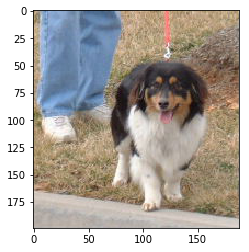

In [8]:
plt.imshow(dog2)

### Image manipulation

Its usually a good idea to manipulate the images with rotation, resizing, and scaling so the model becomes more robust to different images that our data set doesn't have. We can use the ImageDataGenerator to do this automatically for us.

In [9]:
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [10]:
image_gen = ImageDataGenerator(
    rotation_range=30, # Rotate the image by 30 degrees
    width_shift_range=0.1, # Shift the image horizontally by 10% of the width
    height_shift_range=0.1, # Shift the image vertically by 10% of the height
    rescale=1 / 255, # Rescale the image by normalizing pixel values to the range [0, 1]
    shear_range=0.2, # Shear the image by 20%, which distorts the image by cutting away parts
    zoom_range=0.2, # Zoom in on the image by up to 20%
    horizontal_flip=True, # Allow horizontal flipping of the image
    fill_mode='nearest' # Fill in missing pixels after transformations with the nearest pixel value
)

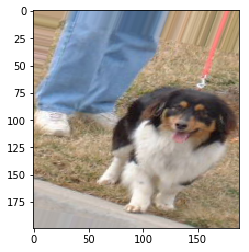

In [11]:
plt.imshow(image_gen.random_transform(dog2))

In [12]:
image_gen.flow_from_directory("C:/Computer Vision/Cats and Dogs/PetImages/CATS_DOGS/train")

Found 18743 images belonging to 2 classes.


In [14]:
image_gen.flow_from_directory("C:/Computer Vision/Cats and Dogs/PetImages/CATS_DOGS/test")

Found 6251 images belonging to 2 classes.


### Resizing images

let's have Keras resize all the iamges to 150 pixels by 150 pixels once they've been manipulated

In [15]:
#width,height,channels
images_shape = (150,150,3)

Creating the Model

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [17]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

In [18]:
model.add(Dense(64))
model.add(Activation('relu'))
#Dropouts help reduce overfitting by randomly truning neurons off during training
#here we say randomly turn off 50% of neurons

model.add(Dropout(0.5))
# Last layer, remember its binary, 0=cat, 1=dog
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy']
             )

In [19]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 82944)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                5308480   
_________________________________________________________________
activation (Activation)      (None, 64)                0         
__________

In [21]:
batch_size=16


train_image_gen = image_gen.flow_from_directory("C:/Computer Vision/Cats and Dogs/PetImages/CATS_DOGS/train",
                                               target_size=images_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 18743 images belonging to 2 classes.


Image_gen is likely an lestance of the Inagelatebenerator class from Keras. 
This class provides way to generate batches of tensor
image data with real-time data augmentation.
The flow from_directory method is used to load images from a
directory in a structured way.
target size image shape(2):
This parameter specifies the target size to which all
images will be resized. The image shape[:2] suggests that image to shape is a tuple, 
and [2] means the width and height.
This ensures that all inages have a uniform size,

In [22]:
test_image_gen = image_gen.flow_from_directory("C:/Computer Vision/Cats and Dogs/PetImages/CATS_DOGS/test",
                                               target_size=images_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 6251 images belonging to 2 classes.


In [23]:
train_image_gen.class_indices

{'CAT': 0, 'DOG': 1}

In [ ]:
results = model.fit_generator(train_image_gen,epochs=10,
                             steps_per_epoch = 15,
                             validation_data = test_image_gen,
                             validation_steps=12)

In [ ]:
results.history['acc']

In [ ]:
plt.plot(results.history['acc'])